In [1]:
%matplotlib inline

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
from glob import glob

In [3]:
""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))
    
    # zeros at beginning (thus center of 1st window should be for sample nr. 0)
    samples = np.append(np.zeros(np.floor(frameSize/2.0)), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))
    
    frames = stride_tricks.as_strided(samples, shape=(cols, frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win
    
    return np.fft.rfft(frames)   

In [5]:
waves = glob('../training_set/*.wav')
print(waves[:5])

['../training_set/M_humanunderstanding_09_hume_64kb.mp3.wav', '../training_set/F_anthem_03_rand_64kb.mp3.wav', '../training_set/F_muchadoaboutnothing_2_shakespeare_64kb.mp3.wav', '../training_set/F_awakeningofeurope_34_synge_64kb.mp3.wav', '../training_set/F_themachinestops_03_forster_64kb.mp3.wav']


In [ ]:
path = waves[1]
binsize = 1024
samplerate, samples = wav.read(path)
s = stft(samples, binsize)

In [12]:
samplerates = []
for path in waves:
    samplerate, samples = wav.read(path)
    samplerates.append(samplerate)

In [19]:
samples = []
for path in waves[:10]:
    sample = wav.read(path)
    samples.append(sample)

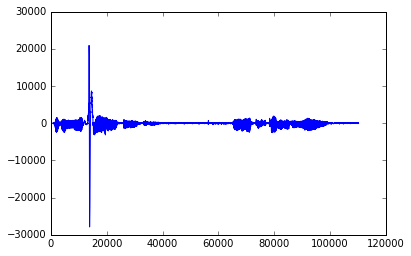

In [24]:
plt.plot(samples[1][1][:, 0])